# Sankey diagram

This example shows how to use {func}`moscot.plotting.sankey`.

:::{seealso}
- See {doc}`100_push_pull` on how to plot push-forward and pull-back distributions.
- See {doc}`200_cell_transitions` on how to plot cell transitions.
:::

## Imports and data loading

In [1]:
import moscot.plotting as mtp
from moscot import datasets
from moscot.problems.time import TemporalProblem

Load the {func}`~moscot.datasets.hspc` dataset.

In [2]:
adata = datasets.hspc()
adata

AnnData object with n_obs × n_vars = 4000 × 2000
    obs: 'day', 'donor', 'cell_type', 'technology', 'n_genes'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'hvg', 'neighbors', 'neighbors_atac', 'pca', 'umap'
    obsm: 'X_lsi', 'X_pca', 'X_umap_ATAC', 'X_umap_GEX', 'peaks_tfidf'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'neighbors_atac_connectivities', 'neighbors_atac_distances'

## Prepare and solve the problem

First, we need to prepare and solve the problem. Here, we set the `threshold`
parameter to a relative high value to speed up convergence at the cost of
lower quality.

In [3]:
tp = TemporalProblem(adata).prepare(time_key="day").solve(epsilon=1e-2, threshold=1e-2)

INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`                                                  
INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`                                                  
INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`                                                  
INFO     Solving problem BirthDeathProblem[stage='prepared', shape=(766, 1235)].                                   
INFO     Solving problem BirthDeathProblem[stage='prepared', shape=(1235, 1201)].                                  
INFO     Solving problem BirthDeathProblem[stage='prepared', shape=(1201, 798)].                                   


As with all plotting functionalities in {mod}`moscot`, we first call the {meth}`~moscot.problems.time.TemporalProblem.sankey` method of the problem class, which stores the results of the computation in the {class}`~anndata.AnnData` instance. Let us assume we want to plot the Sankey diagram across all time points 2, 3, 4, and 7 . Moreover, we want the Sankey diagram to visualize flows between cell types. In general, we can visualize the flow defined by any categorical column in {attr}`~anndata.AnnData.obs` via the `source_groups` and the `target_groups` parameters, respectively.

In this example, we are interested in descendants as opposed to ancestors, which is why we choose `forward = True`. The information required to plot the Sankey diagram is provided in transition matrices, which are saved to {attr}`adata.uns['moscot_results']['sankey']  <anndata.AnnData.uns>` by default. Here, we are only interested in the visualization.

In [4]:
tp.sankey(
    source=2,
    target=7,
    source_groups="cell_type",
    target_groups="cell_type",
    forward=True,
)

## Plot the Sankey diagram

Having called the {meth}`~moscot.problems.time.TemporalProblem.sankey` method of the problem instance, we now pass the result to the {func}`moscot.plotting.sankey`. Therefore, we can either pass the {class}`~anndata.AnnData` instance or the problem instance. We can set the size of the figure via `dpi` and set a title via `title`.

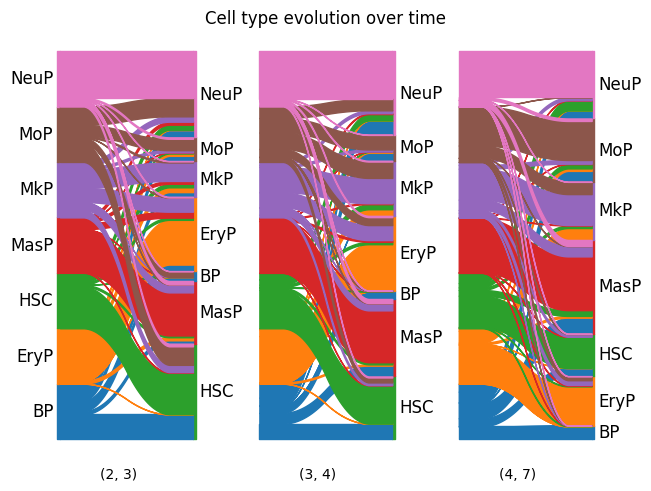

In [5]:
mtp.sankey(tp, dpi=100, title="Cell type evolution over time")

By default, the result of the {func}`moscot.plotting.sankey` is saved in {attr}`adata.uns['moscot_results']['sankey']['sankey'] <anndata.AnnData.uns>` and overrides this element every time the method is called. To prevent this, we can specify the parameter `key_added`, as shown below.

We can also visualize flows of only a subset of categories by passing a {class}`dict` for `source_groups` or `target_groups`. The key should correspond to a value in a categorical {attr}`~anndata.AnnData.obs` column and the values to the subset of interest.

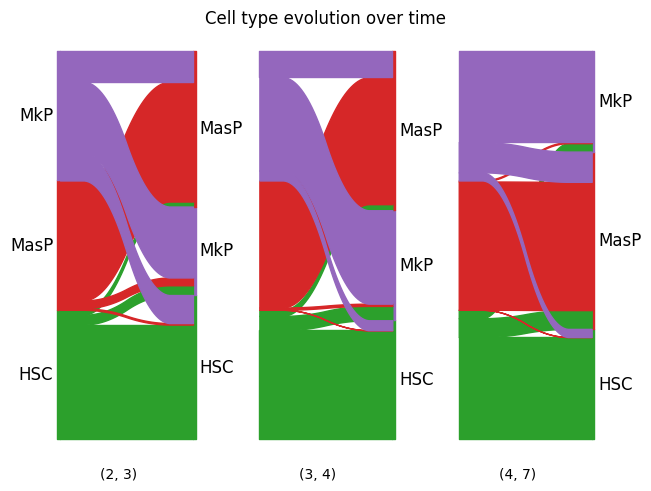

In [6]:
new_key = "subset_sankey"
tp.sankey(
    source=2,
    target=7,
    source_groups={"cell_type": ["HSC", "MasP", "MkP"]},
    target_groups={"cell_type": ["HSC", "MasP", "MkP"]},
    forward=True,
    key_added=new_key,
)
mtp.sankey(tp, dpi=100, title="Cell type evolution over time", key=new_key)